In [6]:
import pandas as pd
MAX_PROTON_FRACTIONS = 15
df = pd.read_csv('data/PayoffMatrix.txt', sep='   ', names=[str(i) + '_prots' for i in range(0,MAX_PROTON_FRACTIONS+1)])
patient_num = df.shape[0]

C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


range(0, 16)


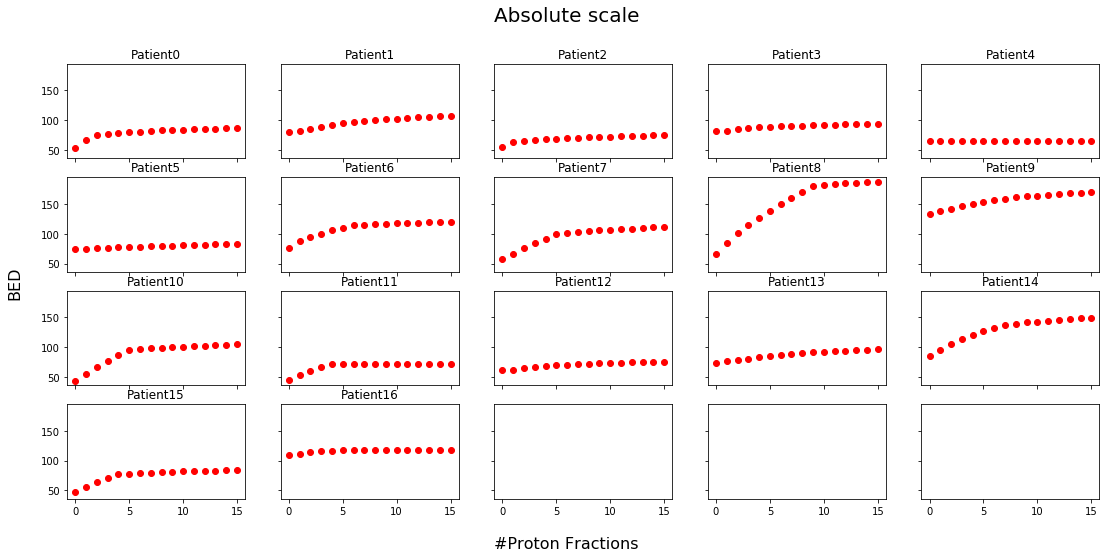

In [7]:
import itertools
import math
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
linestyles = ['_', '-', '--', ':']
color_styles = list(itertools.product(colors,linestyles))
print(range(0,patient_num-1))


def plot_patients(absolute = True):
    Y_plots = 5 # plots per row
    if absolute:
        title = "Absolute scale"
        fig, axarr = plt.subplots(math.ceil((patient_num) / Y_plots), Y_plots, sharex=True, sharey=True) #sharex='col', sharey='row'
    else:
        title = "Relative scale"
        fig, axarr = plt.subplots(math.ceil((patient_num) / Y_plots), Y_plots, sharex=True) #sharex='col', sharey='row'
    for i in range(0,patient_num):
        x,y = math.floor(i / Y_plots), i % Y_plots
        axarr[x,y].plot(range(0,MAX_PROTON_FRACTIONS+1), df.loc[i,], 'ro')#''.join(color_styles[i])
        axarr[x,y].set_title('Patient' + str(i))
    #f.subplots_adjust(hspace=0.3)
    fig.suptitle(title, fontsize=20)
    fig.set_size_inches(18.5, 8)
    fig.text(0.5, 0.04, '#Proton Fractions', ha='center', fontsize=16)
    fig.text(0.08, 0.5, 'BED', va='center', rotation='vertical', fontsize=16)
    plt.show()
plot_patients(True)

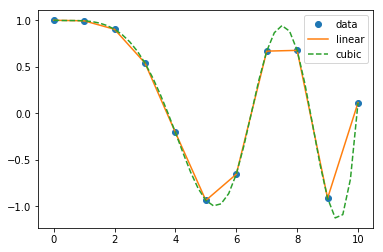

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [6]:
#convex interpolation
from scipy.interpolate import interp1d
import numpy as np

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()
x